In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [37]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [38]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [39]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [40]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [41]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [42]:
def valeur_prediction(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2

In [43]:
def calcul_frontiere(X, parametres, resolution) :
    lim = X.max()
    resolution=resolution
    X1 = np.linspace(-lim, lim, resolution)
    X2 = np.linspace(-lim, lim, resolution)
    X11, X22 = np.meshgrid (X1, X2)
    X_final = np.c_[X11.ravel(), X22.ravel()].T

    A = valeur_prediction(X_final, parametres)
    A = A.reshape(resolution,resolution)
    return(X11, X22, A)


In [56]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten(),labels=[0, 1]))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    
    X11, X22, A = calcul_frontiere(X, parametres, resolution=100)
     
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
    plt.contour(X11, X22, A, levels=[0.5])
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


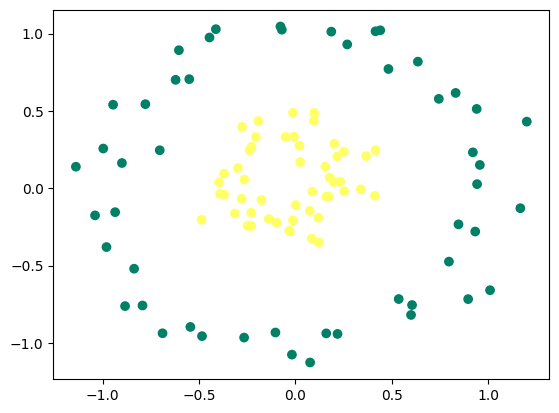

In [80]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=3)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 562.35it/s]


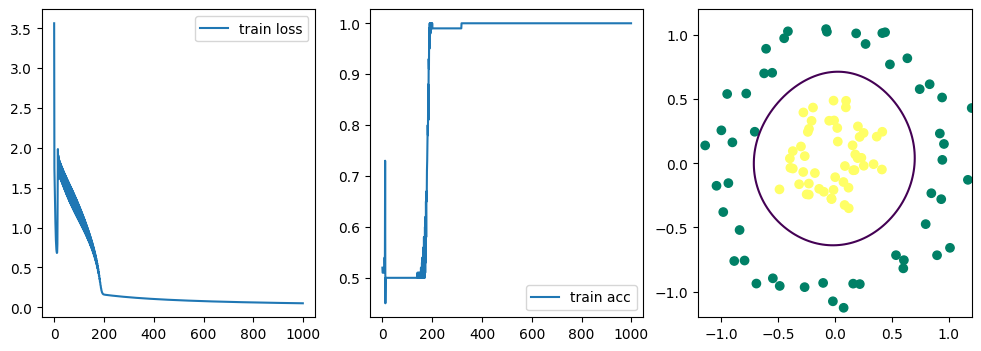

{'W1': array([[ 1.95166988,  0.47414045],
        [ 0.98089166,  2.23994187],
        [ 2.00067959, -1.05869015],
        ...,
        [ 0.21839777,  0.1043592 ],
        [ 1.01775343,  0.69236328],
        [-0.45604555, -1.17327637]]),
 'b1': array([[ 6.86961223e-01],
        [-3.97962548e-01],
        [-6.08007758e-01],
        [-1.70847561e-01],
        [-3.55627053e-02],
        [-1.39012459e-01],
        [-7.17439718e-02],
        [-1.81240416e-02],
        [-1.06903698e-01],
        [-9.06234604e-02],
        [ 4.80857675e-01],
        [ 1.58612458e-01],
        [ 6.30683656e-01],
        [-5.23453210e-02],
        [ 1.71386917e-01],
        [ 3.99104324e-02],
        [ 6.22950203e-01],
        [-2.43653942e-02],
        [ 1.90263654e-01],
        [-3.14881590e-02],
        [ 4.21129026e-01],
        [ 2.62098388e-01],
        [-9.02033573e-03],
        [-2.21349778e-01],
        [-3.69835012e-02],
        [-1.42133219e-01],
        [-1.75866975e-01],
        [ 4.25934650e-03],
 

In [81]:
neural_network(X, y, n1=512)